## 1. 导入相关包

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. 加载数据

In [2]:
# 设置数据文件路径
data_path = '../reference/heros.csv'

In [3]:
# 读取文件
data_raw = pd.read_csv(data_path, encoding = 'gb18030')

初步查看数据

In [4]:
data_raw.head()

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克


In [5]:
data_raw.describe()

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,6580.478261,241.582609,3218.739130,1475.086957,78.753623,372.536232,329.884058,11.687072,166.275362,376.478261,19.868986,98.318841,86.014493,2.752551,47.478261,32.768116,1.309464,14.434783
std,1011.220689,63.662144,190.120059,731.466853,40.405811,168.365025,41.569055,2.720526,7.494869,54.373060,3.146359,13.675324,17.180266,0.835609,6.055160,15.312572,0.676027,8.710167
min,5037.000000,155.500000,2860.000000,0.000000,0.000000,0.000000,263.000000,7.857000,152.000000,295.000000,14.570000,83.000000,63.000000,1.714000,36.000000,0.000000,0.000000,0.000000
25%,5725.000000,190.500000,3083.000000,1694.000000,91.000000,420.000000,295.000000,9.357000,161.000000,336.000000,17.360000,89.000000,71.000000,2.071000,44.000000,36.000000,1.500000,15.000000
50%,6232.000000,235.100000,3225.000000,1770.000000,95.000000,440.000000,321.000000,11.000000,166.000000,361.000000,19.140000,95.000000,81.000000,2.643000,47.000000,38.000000,1.571000,16.000000
75%,7176.000000,280.500000,3364.000000,1926.000000,104.000000,470.000000,361.000000,13.360000,171.000000,400.000000,22.070000,101.000000,98.000000,3.357000,52.000000,42.000000,1.714000,17.000000
max,9328.000000,412.100000,3622.000000,2016.000000,109.000000,490.000000,427.000000,17.860000,188.000000,514.000000,27.290000,150.000000,128.000000,4.929000,59.000000,50.000000,1.929000,50.000000


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 23 columns):
英雄         69 non-null object
最大生命       69 non-null int64
生命成长       69 non-null float64
初始生命       69 non-null int64
最大法力       69 non-null int64
法力成长       69 non-null int64
初始法力       69 non-null int64
最高物攻       69 non-null int64
物攻成长       69 non-null float64
初始物攻       69 non-null int64
最大物防       69 non-null int64
物防成长       69 non-null float64
初始物防       69 non-null int64
最大每5秒回血    69 non-null int64
每5秒回血成长    69 non-null float64
初始每5秒回血    69 non-null int64
最大每5秒回蓝    69 non-null int64
每5秒回蓝成长    69 non-null float64
初始每5秒回蓝    69 non-null int64
最大攻速       69 non-null object
攻击范围       69 non-null object
主要定位       69 non-null object
次要定位       29 non-null object
dtypes: float64(5), int64(13), object(5)
memory usage: 12.5+ KB


## 3. 数据可视化

In [7]:
# 获取相应特征
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',
            u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长',
            u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']

In [8]:
data = data_raw[features]

In [9]:
# 避免中文乱码问题，设置plt正确显示中文
# 正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

使用热力图呈现feature字段之间的相关性

In [10]:
corr = data.corr()

In [11]:
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

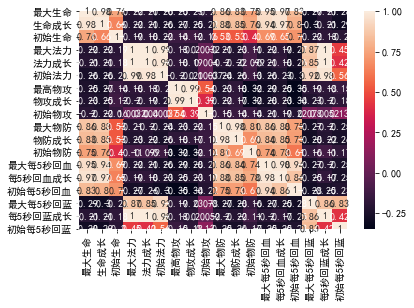

In [12]:
sns.heatmap(corr, annot=True) # annot=True 显示每个方格的数据
plt.show()

## 4. 特征工程

保留相关性大的特征，对特征进行降维

In [13]:
feature_remin = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', 
                 u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']

In [14]:
data = data_raw[feature_remin]

数据规范化

In [15]:
data['最大攻速'].head()

0    28.00%
1    14.00%
2    14.00%
3    14.00%
4    14.00%
Name: 最大攻速, dtype: object

In [16]:
data.loc[:,'最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip("%"))/ 100)

C:\Users\chenpan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
data['最大攻速'].head()

0    0.28
1    0.14
2    0.14
3    0.14
4    0.14
Name: 最大攻速, dtype: float64

In [18]:
data['攻击范围'].head()

0    近战
1    近战
2    近战
3    近战
4    近战
Name: 攻击范围, dtype: object

In [19]:
data.loc[:, '攻击范围'] = data['攻击范围'].map({'远程':1,'近战':0})

In [20]:
data['攻击范围'].head()

0    0
1    0
2    0
3    0
4    0
Name: 攻击范围, dtype: int64

采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1

In [21]:
scaler = StandardScaler()

In [22]:
data = scaler.fit_transform(data)

## 5. 建模并产生结果

构造GMM聚类

gmm = GaussianMixture(n_components=1, covariance_type='full', max_iter=100)

- n_components：即高斯混合模型的个数，也就是要聚类的个数，默认值为 1。如果不指定 n_components，最终的聚类结果都会为同一个值。
- covariance_type：代表协方差类型。一个高斯混合模型的分布是由均值向量和协方差矩阵决定的，所以协方差的类型也代表了不同的高斯混合模型的特征。协方差类型有 4 种取值：
    - covariance_type=full，代表完全协方差，也就是元素都不为 0；
    - covariance_type=tied，代表相同的完全协方差；
    - covariance_type=diag，代表对角协方差，也就是对角不为 0，其余为 0；
    - covariance_type=spherical，代表球面协方差，非对角为 0，对角完全相同，呈现球面的特性。
- max_iter：代表最大迭代次数，EM 算法是由 E 步和 M 步迭代求得最终的模型参数，这里可以指定最大迭代次数，默认值为 100。

In [23]:
gmm = GaussianMixture(n_components=15, covariance_type='full')

生成模型

In [24]:
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=15, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

预测结果

In [25]:
prediction = gmm.predict(data)

In [26]:
print(prediction)

[ 3  3 10  4  2  2  2 10  4  3 12  3  4 14  4 12  3  4  2  8  9  8  8  8
  8  8  8  0  5 13  3 13 13  5 13 13  5  9  1  6 13  5  5 13  5  6  3  1
  3  5  2  7  2 14 14  3  3  7  6  2  3  2 11  3  2  7  7  7  0]


写入文件

In [27]:
data_result = data_raw.copy()
data_result.insert(0, '分组', prediction)

In [28]:
data_result.head(50)

,分组,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,3,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,3,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,10,张飞,8341,329.4,3450,100,0,100,301,10.570,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,4,牛魔,8476,352.8,3537,1926,104,470,273,8.357,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,2,吕布,7344,270.0,3564,0,0,0,343,12.360,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
5,2,亚瑟,8050,316.3,3622,0,0,0,346,13.000,...,106,3.643,55,0,0.000,0,14.00%,近战,战士,坦克
6,2,芈月,6164,281.5,3105,100,0,100,289,9.786,...,77,2.357,44,0,0.000,0,0.00%,远程,法师,坦克
7,10,程咬金,8611,369.6,3437,0,0,0,316,11.070,...,119,4.429,57,0,0.000,0,28.00%,近战,坦克,战士
8,4,廉颇,9328,412.1,3558,1708,92,420,286,8.786,...,128,4.929,59,36,1.500,15,14.00%,近战,坦克,NaN
9,3,东皇太一,7669,319.1,3201,1926,104,470,286,8.786,...,106,3.786,53,42,1.786,17,14.00%,近战,坦克,NaN


保存到本地文件

In [29]:
save_path = '../reference/result.csv'

In [30]:
data_result.to_csv(save_path, encoding="gb18030")